# Importing Libraries

In [27]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Reading dataset and replacing null values with mean

In [28]:

data = pd.read_csv("CC.csv")
X=data.iloc[:,1:]
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)


# Applying Elbow method to determine K value

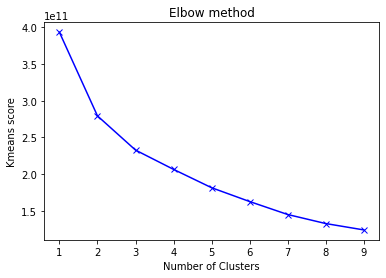

In [29]:
inertias = []
K = range(1,10)
for k in K: 
    kmeanModel = KMeans(n_clusters=k,random_state=42) 
    kmeanModel.fit(X) 
    inertias.append(kmeanModel.inertia_)
    
plt.plot(range(1,10),inertias,'bx-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Kmeans score')
plt.show()

# Applying KMeans Clustering without scaling

In [30]:
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(X)
y_cluster_kmeans = km.predict(X)

# Calculating Silhouette score

In [32]:

score_beforescaling = metrics.silhouette_score(X, y_cluster_kmeans)
print("score before scaling is:",score_beforescaling)

score before scaling is: 0.46660503292524474


# Applying feature scaling

In [33]:
from sklearn import preprocessing 
scaler =preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array=scaler.transform(X) 
X_scaled=pd.DataFrame(X_scaled_array)

# Applying KMeans after scaling

In [34]:

nclusters = 3
km = KMeans(n_clusters=nclusters,random_state=42)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)

# Calculating Silhouette score after scaling

In [35]:
score_afterscaling = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("score after scaling is:",score_afterscaling)

score after scaling is: 0.25059934300557285


# Applying PCA

In [36]:
from sklearn.decomposition import PCA
pca= PCA(2) 
X_pca= pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)
finaldata = pd.concat([X_pca, data[['TENURE']]], axis=1)


# Applying KMeans after PCA

In [37]:
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(X_pca)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)
score_pca = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print("Score with PCA and Kmeans: ", score_pca)

Score with PCA and Kmeans:  0.5720155554021095


# KMeans model after applying PCA on scaled data

In [38]:

pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)


# Calculating Silhouette score of applying PCA on scaled data

In [39]:
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)
print("Score with PCA and Kmeans: ", pca_scaled_score )

Score with PCA and Kmeans:  0.45232408325134504


# Score comparisons

In [40]:
print("score before scaling is:",score_beforescaling)
print("score after scaling is:",score_afterscaling)
print("Score with PCA and Kmeans: ", score_pca)
print("Score with PCA and Kmeans: ", pca_scaled_score )

score before scaling is: 0.46660503292524474
score after scaling is: 0.25059934300557285
Score with PCA and Kmeans:  0.5720155554021095
Score with PCA and Kmeans:  0.45232408325134504


# Plotting clusters

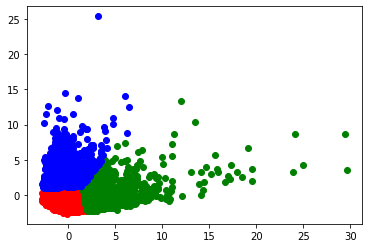

In [44]:

colors=["red","green","blue"]
for i in range(3):
    x_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:, 0]
    y_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i])